In [51]:
import math
import numpy as np
import pandas
import itertools
from sklearn.metrics import precision_score


ui_data = pandas.read_csv('../working_data/updrsi_all_q_p_s.csv')

In [68]:
def query_builder(qs, threshold):
    output = ""
    for q in qs:
        add = f'{q} > {threshold} and '
        output = output + add        
    return output[:-5]

def test_q_subset(source,qs, threshold, results):
    df_tmp = source.query(query_builder(qs, threshold))
    row,_ = df_tmp.shape
    if row > 5:
        y = df_tmp['SIGFALL']
        predictions = [1.0] * len(y)
        p = precision_score(y, predictions, zero_division=0)
        if p > 0.49:
            results.append((qs, p))

def create_hist_data(source,qs, threshold, results):
    df_tmp = source.query(query_builder(qs, threshold))
    row,_ = df_tmp.shape
    if row > 5:
        y = df_tmp['SIGFALL']
        predictions = [1.0] * len(y)
        p = precision_score(y, predictions, zero_division=0)
        results.append(p)

In [53]:
ui_all_qs = {'D_NP1COG', 'D_NP1HALL', 'D_NP1DPRS', 'D_NP1ANXS', 'D_NP1APAT','D_NP1DDS', 'D_NP1SLPN','D_NP1SLPD','D_NP1PAIN','D_NP1URIN','D_NP1CNST','D_NP1LTHD','D_NP1FATG','D_NP1TOT'}

ui_sets = []

for x in range(1,len(ui_all_qs)):
    ui_sets.append(list(itertools.combinations(ui_all_qs, x)))

In [54]:
ui_flatten = [element for sublist in ui_sets for element in sublist]
print(len(ui_flatten))
ui_flatten[0]

16382


('D_NP1PAIN',)

In [69]:
# Try ALL the combinations:

ui_0_results = []
ui_0_hist = []
for qs in ui_flatten:
    test_q_subset(ui_data, qs,0, ui_0_results)
    #create_hist_data(ui_data, qs, 0, ui_0_hist)
    

In [56]:
ui_0_results

[(('D_NP1DDS', 'D_NP1CNST'), 0.5),
 (('D_NP1TOT', 'D_NP1DDS', 'D_NP1APAT'), 0.5),
 (('D_NP1FATG', 'D_NP1DDS', 'D_NP1SLPN'), 0.5714285714285714),
 (('D_NP1DDS', 'D_NP1CNST', 'D_NP1SLPN'), 0.5),
 (('D_NP1PAIN', 'D_NP1DPRS', 'D_NP1CNST', 'D_NP1URIN'), 0.5),
 (('D_NP1ANXS', 'D_NP1FATG', 'D_NP1COG', 'D_NP1LTHD'), 0.5),
 (('D_NP1TOT', 'D_NP1FATG', 'D_NP1DDS', 'D_NP1SLPN'), 0.5),
 (('D_NP1TOT', 'D_NP1FATG', 'D_NP1COG', 'D_NP1LTHD'), 0.47058823529411764),
 (('D_NP1TOT', 'D_NP1DPRS', 'D_NP1CNST', 'D_NP1URIN'), 0.45454545454545453),
 (('D_NP1FATG', 'D_NP1COG', 'D_NP1LTHD', 'D_NP1APAT'), 0.5),
 (('D_NP1PAIN', 'D_NP1TOT', 'D_NP1DPRS', 'D_NP1CNST', 'D_NP1URIN'), 0.5),
 (('D_NP1ANXS', 'D_NP1TOT', 'D_NP1FATG', 'D_NP1COG', 'D_NP1LTHD'), 0.5),
 (('D_NP1TOT', 'D_NP1FATG', 'D_NP1COG', 'D_NP1LTHD', 'D_NP1APAT'), 0.5)]

In [70]:
a,b = ui_0_results[0]
list(a)
z = []

for x in ui_0_results:
    a,_ = x
    z.append(list(a))
    
flatten_list = [element for sublist in z for element in sublist]
flatten_list

(unique, counts) = np.unique(flatten_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([['D_NP1ANXS', '2'],
       ['D_NP1APAT', '3'],
       ['D_NP1CNST', '4'],
       ['D_NP1COG', '4'],
       ['D_NP1DDS', '5'],
       ['D_NP1DPRS', '2'],
       ['D_NP1FATG', '6'],
       ['D_NP1LTHD', '4'],
       ['D_NP1PAIN', '2'],
       ['D_NP1SLPN', '3'],
       ['D_NP1TOT', '5'],
       ['D_NP1URIN', '2']], dtype='<U21')

In [57]:
import matplotlib.pyplot as plt

# log_ui_hist = [np.log(ui_0_hist)]
# plt.hist(log_ui_hist, histtype='stepfilled')
# plt.show() 

In [58]:
ui_1_results = []
ui_1_hist = []
for qs in ui_flatten:
    test_q_subset(ui_data, qs,1, ui_1_results)
    # create_hist_data(ui_data, qs, 0, ui_1_hist)
    
# plt.hist(ui_1_hist)
# plt.show()
ui_1_results

[]

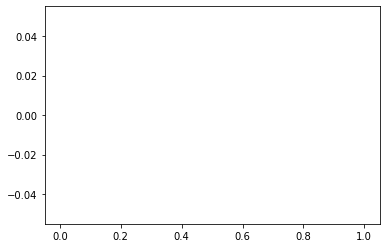

In [38]:
ui_2_results = []
ui_2_hist = []
for qs in ui_flatten:
    #test_q_subset(ui_data, qs,2, ui_2_results)
    create_hist_data(ui_data, qs, 0, ui_1_hist)

plt.hist(ui_2_hist)
plt.show()

In [29]:
ui_3_results = []
for qs in ui_flatten:
    test_q_subset(ui_data, qs,3, ui_3_results)
    
ui_3_results

[]

In [ ]:
# Box plot maybe ????